# Random Forest

# Company_Data dataset

In [1]:
# import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# read the data
company = pd.read_csv('C:/Users/Admin/Documents/data science assignment/Randam Forest/Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# Data Processing

In [5]:
# Encode the sales data
label_encoder = preprocessing.LabelEncoder()
company['Sales']= label_encoder.fit_transform(company['Sales']) 
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,255,138,73,11,276,120,Bad,42,17,Yes,Yes
1,297,111,48,16,260,83,Good,65,10,Yes,Yes
2,267,113,35,10,269,80,Medium,59,12,Yes,Yes
3,158,117,100,4,466,97,Medium,55,14,Yes,Yes
4,37,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,320,138,108,17,203,128,Good,33,14,Yes,Yes
396,114,139,23,3,37,120,Medium,55,11,No,Yes
397,159,162,26,12,368,159,Medium,40,18,Yes,Yes
398,106,100,79,7,284,95,Bad,50,12,Yes,Yes


In [6]:
company['Sales'].describe()

count    400.000000
mean     165.225000
std       94.449463
min        0.000000
25%       84.750000
50%      163.000000
75%      243.000000
max      335.000000
Name: Sales, dtype: float64

In [7]:
company['Sales_New']=pd.cut(company.Sales,bins=[0,163,335],labels=['Low','High'])
df2=company.drop(['Sales'],axis=1)
df2

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_New
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [8]:
df=pd.get_dummies(df2)
df

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales_New_Low,Sales_New_High
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,1,0
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,1,0
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,1,0
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,1,0


In [9]:
df1=df.drop(['Sales_New_High'],axis=1)
df1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales_New_Low
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,0
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,1


In [10]:
X = df1.drop(['Sales_New_Low'],axis=1)
y = df1['Sales_New_Low']

In [11]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,stratify = y)

# Building Random Forest model using Entropy

In [12]:
from sklearn.ensemble import  RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score =True,criterion = 'entropy')
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [13]:
model.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=823164068),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1836894583),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1964490640),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1454282739),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=233306693),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=546297636),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=2025727051),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=2054775944),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
         

In [14]:
model.classes_

array([0, 1], dtype=uint8)

In [15]:
model.n_features_

14

In [16]:
model.n_classes_

2

In [17]:
model.n_outputs_

1

In [18]:
model.oob_score_

0.690625

In [19]:
# Prediction on train data
prediction = model.predict(X_train)

In [20]:
# Accuracy
accuracy = accuracy_score(y_train,prediction)
accuracy

1.0

In [21]:
np.mean(prediction == y_train)

1.0

In [22]:
# confusion matrix
confusion = confusion_matrix(y_train,prediction)
confusion

array([[160,   0],
       [  0, 160]], dtype=int64)

In [23]:
# prediction on test data
pred_test = model.predict(X_test)
pred_test

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1], dtype=uint8)

In [24]:
# Accuracy
acc_test = accuracy_score(y_test,pred_test)
acc_test

0.8375

#### sales.high accuracy for y_train is 100%  and y_test accracy is 83.75% 

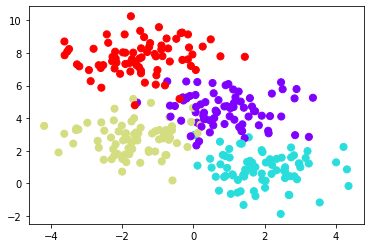

In [25]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

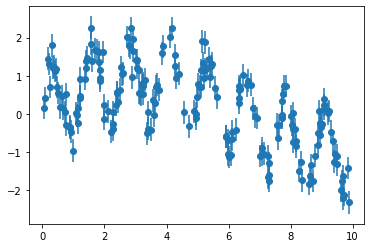

In [27]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

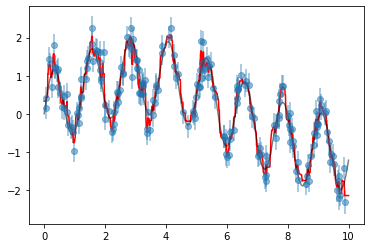

In [28]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);